In [1]:
import numpy,  matplotlib_venn, pandas

In [2]:
import sklearn, sklearn.preprocessing, sklearn.decomposition

In [3]:
import scipy, scipy.signal, scipy.optimize
import statsmodels, statsmodels.stats, statsmodels.stats.multitest

In [4]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [5]:
input_file = '230117_Arnar.lfq.proteins_From_Gudrun.xlsx'
df = pandas.read_excel(input_file)
df.shape

(7841, 88)

In [6]:
labels = []
for element in df.columns:
    if 'ADRNOR_4H_' in element:
        labels.append(element)
    if 'CTRL_4H_' in element:
        labels.append(element)
    if 'ADRNOR_24H_' in element:
        labels.append(element)
    if 'CTRL_24H_' in element:
        labels.append(element)

working_labels=['adr4_a', 'adr4_b', 'adr4_c', 'ctl4_a', 'ctl4_b', 'ctl4_c', 'adr24_a', 'adr24_b', 'adr24_c', 'ctl24_a', 'ctl24_b', 'ctl24_c']
for i in range(12):
    print(working_labels[i], '\t', labels[i*2], labels[(i*2)+1])
    df.insert(0, 
              working_labels[i], 
              numpy.median(numpy.log10(df.loc[:, [labels[i*2], labels[(i*2)+1]]] + 1), axis=1))

print(df.loc[:, 'ctl24_c'])
print(df.loc[:, ['CTRL_24H_3_1_2846 Area', 'CTRL_24H_3_2_2847 Area']])

adr4_a 	 ADRNOR_4H_1_1_2792 Area ADRNOR_4H_1_2_2793 Area
adr4_b 	 ADRNOR_4H_2_1_2795 Area ADRNOR_4H_2_2_2796 Area
adr4_c 	 ADRNOR_4H_3_1_2798 Area ADRNOR_4H_3_2_2799 Area
ctl4_a 	 CTRL_4H_1_1_2752 Area CTRL_4H_1_2_2753 Area
ctl4_b 	 CTRL_4H_2_1_2755 Area CTRL_4H_2_2_2756 Area
ctl4_c 	 CTRL_4H_3_1_2758 Area CTRL_4H_3_2_2759 Area
adr24_a 	 ADRNOR_24H_1_1_2931 Area ADRNOR_24H_1_2_2932 Area
adr24_b 	 ADRNOR_24H_2_1_2934 Area ADRNOR_24H_2_2_2935 Area
adr24_c 	 ADRNOR_24H_3_1_2937 Area ADRNOR_24H_3_2_2938 Area
ctl24_a 	 CTRL_24H_1_1_2840 Area CTRL_24H_1_2_2841 Area
ctl24_b 	 CTRL_24H_2_1_2843 Area CTRL_24H_2_2_2844 Area
ctl24_c 	 CTRL_24H_3_1_2846 Area CTRL_24H_3_2_2847 Area
0       5.089618
1       4.844506
2       3.140769
3       4.218827
4       3.041445
          ...   
7836    3.335474
7837    3.372160
7838    3.146240
7839    2.382172
7840    5.096305
Name: ctl24_c, Length: 7841, dtype: float64
      CTRL_24H_3_1_2846 Area  CTRL_24H_3_2_2847 Area
0               122365.50000          

In [7]:
# there are 2,074 duplicated measurements
print(df.shape)

duplicate_rows = df.duplicated(subset=working_labels)
print(sum(duplicate_rows))

df.drop_duplicates(subset=working_labels, inplace=True)
print(df.shape)

(7841, 100)
2073
(5768, 100)


In [8]:
expression = df.loc[:, working_labels]
expression

,adr4_a,adr4_b,adr4_c,ctl4_a,ctl4_b,ctl4_c,adr24_a,adr24_b,adr24_c,ctl24_a,ctl24_b,ctl24_c
0,4.816191,4.933492,5.029437,4.873425,4.764226,4.901643,4.979756,5.030692,4.967146,4.969948,4.974258,5.089618
1,4.577300,4.655921,4.854328,4.783094,4.693890,4.713808,4.780125,4.709794,4.848378,4.934329,4.889397,4.844506
2,3.052241,3.104157,2.820984,3.010410,2.981915,2.768906,2.793818,3.117343,2.990135,3.059799,2.883875,3.140769
3,4.734856,4.768831,3.931579,4.728926,4.551648,4.751529,4.306003,4.631349,4.478135,4.277060,4.226725,4.218827
4,2.537231,2.688449,2.963676,2.448499,2.497262,2.548651,2.936971,2.883973,2.760294,2.909769,3.098687,3.041445
...,...,...,...,...,...,...,...,...,...,...,...,...
7829,3.992450,4.159464,4.313238,4.206416,3.916905,4.132230,4.511206,4.081358,4.085586,4.324449,4.152282,4.329389
7832,3.326392,3.223129,3.094839,3.503372,3.339453,3.407068,3.022372,3.114346,3.214231,3.022019,3.164889,3.011585
7834,2.872822,3.155754,1.057776,2.901560,3.369457,3.215667,3.173283,3.272413,3.070210,2.884978,2.392906,3.133861
7836,3.179773,3.207424,3.580978,3.452886,3.260695,3.424398,3.399986,3.219645,3.147484,3.220431,3.496198,3.335474


315
5768 0.0 6.035969406705279
5768 0.0 6.082205986946088
5768 0.0 6.091356950730641
5768 0.0 5.969652705991296
5768 0.0 6.00938626710599
5768 0.0 6.033506398572915
5768 0.0 6.075874086560875
5768 0.0 5.944141683623853
5768 0.0 6.04087497349968
5768 0.0 6.112953602754659
5768 0.0 6.120725590211618
5768 0.0 6.202615411006087


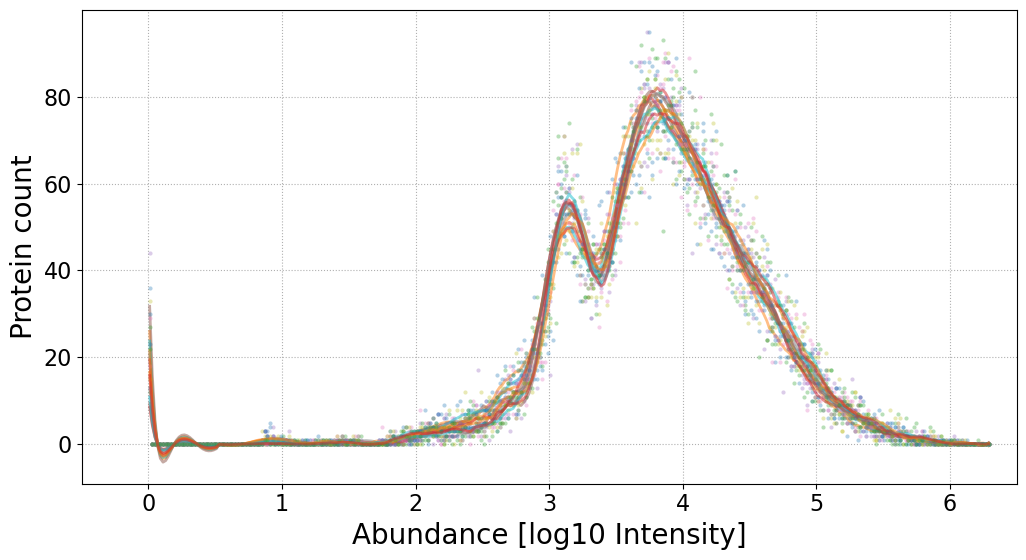

In [9]:
found_max = 6.3
resolution = 50
number_of_bins = int(resolution * found_max)
print(number_of_bins)

for sample in expression.columns:
    values = expression.loc[:, sample]
    print(len(values), numpy.min(values), numpy.max(values))
        
    hist, bin_edges = numpy.histogram(values, bins=number_of_bins, range=(0, found_max))
    half_bin = (bin_edges[1] - bin_edges[0])/2
    x = bin_edges + half_bin
    x = x[:-1]
    matplotlib.pyplot.plot(x, hist, '.', alpha=1/3, mec='none')

    yhat = scipy.signal.savgol_filter(hist, 51, 7)
    matplotlib.pyplot.plot(x, yhat, '-', lw=2, alpha=1/2)
    
matplotlib.pyplot.xlabel('Abundance [log10 Intensity]')
matplotlib.pyplot.ylabel('Protein count')
matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.xlim(-0.5, 6.5)

matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

# consider plotting here the CV for each log10 block. 

# make pca

In [10]:
substantial_expression = expression[expression.max(axis=1) >= 3.5]
high_expression = expression[expression.max(axis=1) >= 4.5]

print(substantial_expression.shape)
print(high_expression.shape)

(4596, 12)
(1237, 12)


In [11]:
pca_data = high_expression.transpose()
print(high_expression.shape)
pca_data

(1237, 12)


,0,1,3,17,25,32,36,39,43,55,...,7779,7786,7796,7801,7802,7807,7810,7817,7829,7840
adr4_a,4.816191,4.577300,4.734856,4.401110,4.516320,4.753480,4.788542,4.701496,4.612147,4.109169,...,4.376387,4.684187,4.535487,4.214859,5.290584,4.722200,4.435401,4.636838,3.992450,4.844625
adr4_b,4.933492,4.655921,4.768831,4.458847,4.649017,4.745272,4.780447,4.723914,4.608478,4.258582,...,4.435313,4.916649,4.750762,4.347368,5.379085,4.723892,4.535912,4.798146,4.159464,5.047393
adr4_c,5.029437,4.854328,3.931579,4.654473,4.940683,4.771381,4.567016,4.713296,4.699117,4.322805,...,2.719215,5.132076,4.765785,4.445767,5.524483,3.757760,4.543785,4.891917,4.313238,5.173841
ctl4_a,4.873425,4.783094,4.728926,4.635799,4.654408,4.713997,4.730510,4.318548,4.712300,4.349632,...,4.447304,4.667362,4.802783,4.342551,5.395763,4.775947,4.391916,4.663458,4.206416,4.879970
ctl4_b,4.764226,4.693890,4.551648,4.573969,4.529268,4.759307,4.802771,4.605078,4.677668,4.155277,...,4.436463,4.790231,4.848459,4.265437,5.340308,4.737056,4.442263,4.523330,3.916905,4.842671
ctl4_c,4.901643,4.713808,4.751529,4.475033,4.522599,4.701156,4.611312,4.704133,4.679081,4.379817,...,4.308706,4.999785,4.697090,4.295955,5.279868,4.741388,4.450591,4.507401,4.132230,4.957661
adr24_a,4.979756,4.780125,4.306003,4.709207,5.042216,4.722068,4.675459,4.602665,4.651291,4.547467,...,4.512979,5.080169,4.831035,4.358866,5.383686,4.588231,4.548559,4.872705,4.511206,5.078664
adr24_b,5.030692,4.709794,4.631349,4.644431,5.024428,4.769488,4.748611,4.662676,4.616775,4.211341,...,4.578193,5.056027,4.699195,4.397321,5.416094,4.648863,4.588904,4.941557,4.081358,5.068881
adr24_c,4.967146,4.848378,4.478135,4.504926,4.955209,4.790826,4.739098,4.769401,4.640217,4.403525,...,4.645204,4.894976,4.817199,4.397362,5.453634,4.706654,4.549016,4.884186,4.085586,5.043879
ctl24_a,4.969948,4.934329,4.277060,4.651265,4.985997,4.829619,4.859692,4.722018,4.787638,4.405900,...,4.657865,4.994592,4.892441,4.481207,5.469543,4.734474,4.723679,5.049045,4.324449,5.089659


In [12]:
scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_data)

print(numpy.mean(scaled_data[:, 0]))
print(numpy.std(scaled_data[:, 0]))
print(scaled_data[:, 0])

model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

2.535009239560774e-15
1.0000000000000002
[-1.43845396 -0.11983619  0.95870701 -0.79507372 -2.02260792 -0.47786739
  0.40022788  0.97281166  0.25847301  0.28997202  0.33842241  1.63522519]
[0.36569932 0.17398787]


In [13]:
my_colors = ['gold']*3 + ['skyblue']*3 + ['gold']*3 + ['skyblue']*3 
my_markers = ['o']*6 + ['s']*6

legend_elements = [
    
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='gold', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='skyblue', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='s', markerfacecolor='gold', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='s', markerfacecolor='skyblue', markeredgecolor='white', markersize=20, alpha=2/3),
]

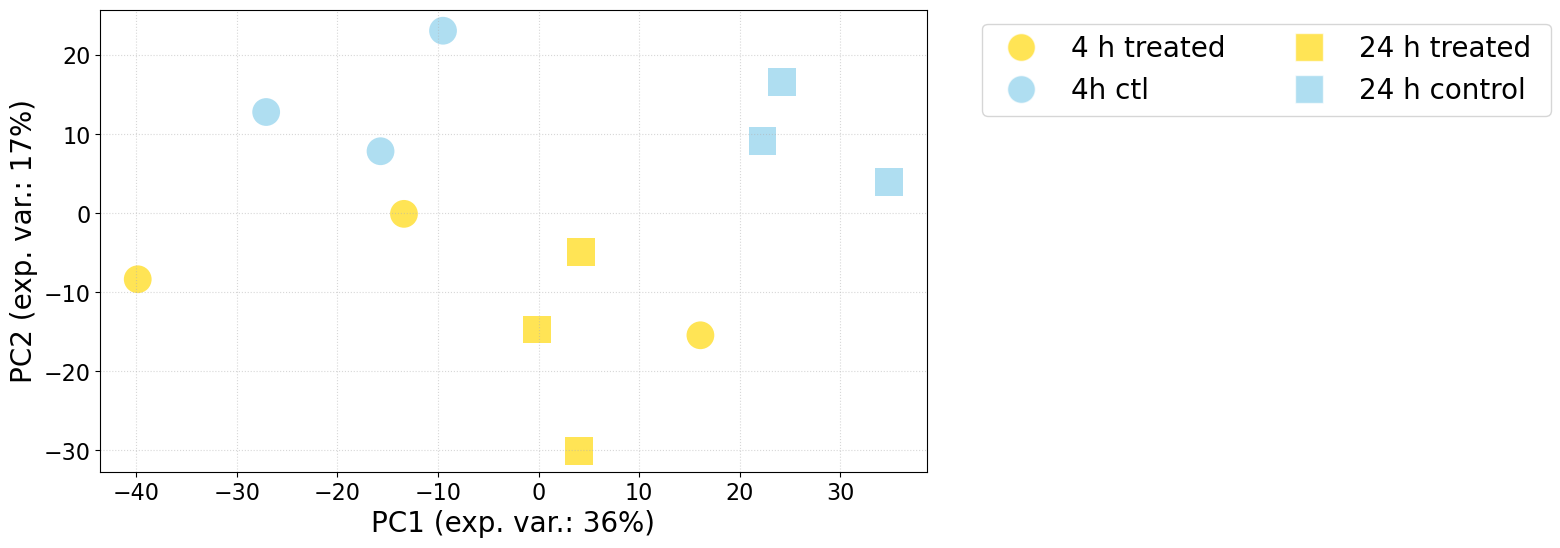

In [14]:
for i in range(len(new)):
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=400, c=my_colors[i], marker=my_markers[i], alpha=2/3, edgecolors='none')


matplotlib.pyplot.legend(legend_elements, ['4 h treated', '4h ctl', '24 h treated ', '24 h control'], ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1))

matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')

2.535009239560774e-15
1.0000000000000002
[-1.43845396 -0.11983619  0.95870701 -0.79507372 -2.02260792 -0.47786739
  0.40022788  0.97281166  0.25847301  0.28997202  0.33842241  1.63522519]
[0.33453833 0.14793337]


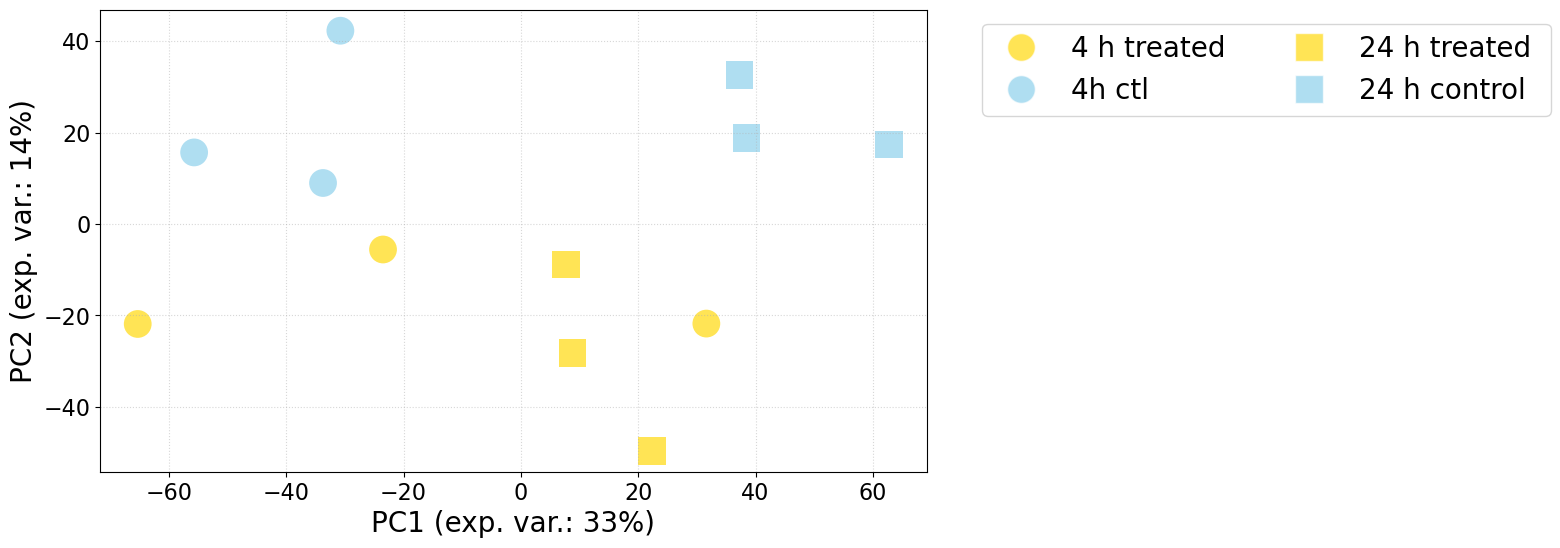

In [15]:
pca_data = substantial_expression.transpose()
pca_data

scaled_data = sklearn.preprocessing.StandardScaler().fit_transform(pca_data)

print(numpy.mean(scaled_data[:, 0]))
print(numpy.std(scaled_data[:, 0]))
print(scaled_data[:, 0])

model = sklearn.decomposition.PCA(n_components=2)
new = model.fit_transform(scaled_data)
explained = model.explained_variance_ratio_
print(explained)

my_colors = ['gold']*3 + ['skyblue']*3 + ['gold']*3 + ['skyblue']*3 
my_markers = ['o']*6 + ['s']*6

legend_elements = [
    
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='gold', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='o', markerfacecolor='skyblue', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='s', markerfacecolor='gold', markeredgecolor='white', markersize=20, alpha=2/3),
    matplotlib.lines.Line2D([0], [0], color='white', marker='s', markerfacecolor='skyblue', markeredgecolor='white', markersize=20, alpha=2/3),
]

for i in range(len(new)):
    matplotlib.pyplot.scatter(new[i,0], new[i,1], s=400, c=my_colors[i], marker=my_markers[i], alpha=2/3, edgecolors='none')


matplotlib.pyplot.legend(legend_elements, ['4 h treated', '4h ctl', '24 h treated ', '24 h control'], ncol=2, loc='upper left', bbox_to_anchor=(1.05, 1))

matplotlib.pyplot.xlabel('PC1 (exp. var.: {}%)'.format(int(explained[0]*100)))
matplotlib.pyplot.ylabel('PC2 (exp. var.: {}%)'.format(int(explained[1]*100)))
matplotlib.pyplot.grid(alpha=0.5, ls=':')

# make venn diagram

In [16]:
wdf = pandas.read_csv('colored_proteins_04.tsv', sep='\t')
#for element in wdf['Gene_name'].to_list():
#    print(element)

In [17]:
wdf = pandas.read_csv('colored_proteins_04.tsv', sep='\t')
b1 = set(wdf[(wdf['Color_in_plot'] == 'blue') | (wdf['Color_in_plot'] == 'red')]['Uniprot_ID'])

wdf = pandas.read_csv('colored_proteins_24.tsv', sep='\t')
b2 = set(wdf[(wdf['Color_in_plot'] == 'blue') | (wdf['Color_in_plot'] == 'red')]['Uniprot_ID'])

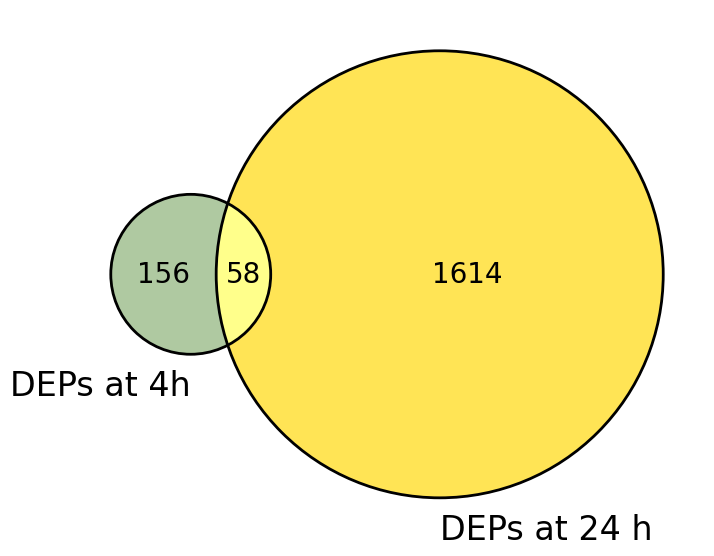

In [18]:
matplotlib_venn.venn2(subsets=(b1, b2),
                      set_labels=('DEPs at 4h', 'DEPs at 24 h'), 
                      set_colors=('xkcd:sage', 'gold'),
                      alpha=2/3)
matplotlib_venn.venn2_circles(subsets=(b1, b2))  

matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.show()
matplotlib.pyplot.savefig('venn.svg')

In [20]:
only_A = b1 - b2
only_B = b2 - b1
in_both = b1 & b2

print(len(only_A))
print(len(only_B))
print(len(in_both))

156
1614
58


In [23]:
max_len = max(len(only_A), len(only_B), len(in_both))

df = pandas.DataFrame({
    "only_4h": list(only_A) + [""] * (max_len - len(only_A)),
    "only_24h": list(only_B) + [""] * (max_len - len(only_B)),
    "in_both": list(in_both) + [""] * (max_len - len(in_both)),
})

df.to_csv("venn_sets.tsv", sep="\t", index=False)